In [1]:
import numpy as np

%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('../../solving_pde_mooc/notebooks/styles/mainstyle.use')

In [2]:
# parameters and initial conditions

g = 9.81     # ms^-2 
h0 = 100.    # intial height
v0 = 0.      # initial velocity
    
ti = 0.      # initial time
tf = 4.      # final time at which we want to seek solution
dt = 0.1     # time step

In [3]:
nt = int((tf-ti)/dt)

# define the numpy array with nt+1 elements as we want to define solution at ti, tf and all intermediate points
# this time we will define a 2D numpy array (but we will not call it a matrix -- why??)
y = np.empty((nt+1,2)) # numpy.empty((no. of rows, no. of cols))

# storing the initial condition
# ideally, since y is a 2D array, you need to pass two integers so you need to define 2 indices
# index of the row and index of the column
# however, if you only pass one integer, it is considered the index of the row
# and you get access to all the columns
y[0] = h0, v0

# creating the array vector b
b = np.array([0., -g])

# creating the array L
L = np.array([[0.,1.],[0.,0.]])

# the default type of values in numpy array is double
# even if we pass integer, it will considered as double
# we have still passed it as double to be explicit

# note that we have created the array vector b and array L above
# before that, I created a 2 D array y
# both are arrays

# to create and array with defined values - 
# numpy.array([[row1col1 val, row1col2 val,...], [row2col1 val, row2col2 val ...], ...,])

# to create array with defined no. of rows and no. of cols. and initialize where we don't know the values
# numpy.empty((no. of rows, no. of cols))

for i in range(nt):
    y[i+1] = y[i] + np.dot(L,y[i])*dt + b*dt
    
    # remember we are only passing one index, which is considered as row index
    # by doing so, we are accessing all columns at once

In [21]:
t = np.arange(nt+1)*dt

Text(0.5, 1.0, 'Height vs time (m)')

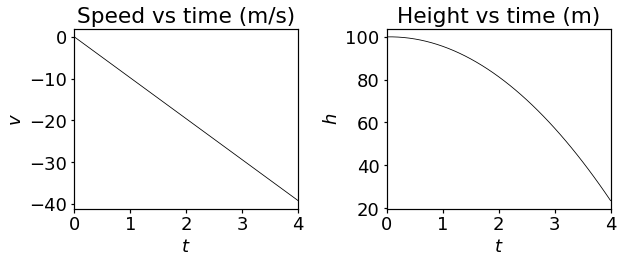

In [5]:
fig, ax = plt.subplots(1,2, figsize=(9,4))

ax[0].plot(t,y[:,1],'-k',lw=0.8)
ax[0].set_xlim(t[0],t[-1])
ax[0].set_xlabel('$t$')
ax[0].set_ylabel('$v$')
ax[0].set_title('Speed vs time (m/s)')

ax[1].plot(t,y[:,0],'-k',lw=0.8)
ax[1].set_xlim(t[0],t[-1])
ax[1].set_xlabel('$t$')
ax[1].set_ylabel('$h$')
ax[1].set_title('Height vs time (m)')

In [23]:
# parameters

k = 2       # spring constant
m = 1       # mass of object
gamma = np.sqrt(k/m)

# initial conditions

x0 = 0.75   # initial position
v0 = 0.     # initial velocity

# discretization of time

ti = 0.     # intial time
tf = 40.0   # final time at which solution is needed
dt = 0.15   # time step / discretization

In [34]:
# defining the time discretization
nt = int((tf-ti)/dt)

# creating a numpy array for values of position (x) and velocity (v)
y = np.empty((nt+1,2))

# storing the initial condition
y[0] = x0, v0

# creating the matrix L
L = np.array([[0., 1.],
              [-gamma**2, 0.]])

# performing time stepping / numerical integration using forward euler's method
for i in range(nt):
    y[i+1] = y[i] + np.dot(L,y[i])*dt

In [35]:
t = np.arange(nt+1)*dt

(0.0, 40.0)

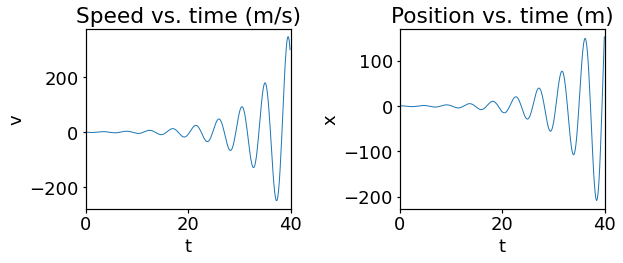

In [42]:
fig, ax = plt.subplots(1, 2, figsize=(9,4))

ax[0].plot(t,y[:,1]) # plotting speed
ax[0].set_xlabel('t')
ax[0].set_ylabel('v')
ax[0].set_title('Speed vs. time (m/s)')
ax[0].set_xlim(0,40)

ax[1].plot(t,y[:,0]) # plotting position
ax[1].set_xlabel('t')
ax[1].set_ylabel('x')
ax[1].set_title('Position vs. time (m)')
ax[1].set_xlim(0,40)

In [43]:
# parameter definition

alpha = 0.25      # exponential law coefficient

# initial condition
Ni = 100

# discretization of time
ti = 0.0
tf = 15.0
dt = 1.0

In [46]:
nt = int((tf-ti)/dt)

N = np.empty((nt+1,2))

N[0] = Ni, Ni

# definining the implicit coefficient
coeff_imp = (1+alpha*dt)**(-1)

for i in range(nt):
    N[i+1,0] = N[i,0] - alpha*N[i,0]*dt   # explicit solution
    N[i+1,1] = coeff_imp*N[i,1]           # implicit solution

In [48]:
t = np.arange(nt+1) * dt

N_exact = Ni * np.exp(-alpha*t)

Text(0.5, 1.0, 'Radioactive Decay')

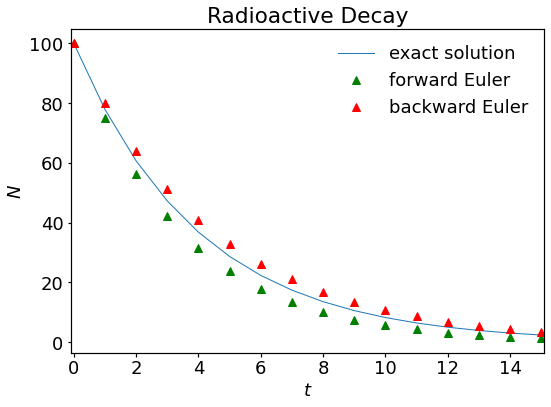

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

ax.plot(t,N_exact, label='exact solution')
ax.plot(t,N[:,0],'^',color='green',label='forward Euler')
ax.plot(t,N[:,1],'^',color='red',label='backward Euler')

ax.set_xlim(t[0]-0.1,t[-1]+0.1)
ax.legend()

ax.set_xlabel('$t$')
ax.set_ylabel('$N$')
ax.set_title('Radioactive Decay')

In [92]:
# parameters

k = 2       # spring constant
m = 1       # mass of object
gamma = np.sqrt(k/m)

# initial conditions

x0 = 0.75   # initial position
v0 = 0.     # initial velocity

# discretization of time

ti = 0.     # intial time
tf = 40.0   # final time at which solution is needed
dt = 0.15   # time step / discretizatio

In [93]:
nt = int((tf-ti)/dt)
t = np.arange(nt+1) * dt

y_imp = np.empty((nt+1,2))
y_exp = np.empty((nt+1,2))

# initializing
y_imp[0] = x0, v0
y_exp[0] = x0,v0

# defining implicit and explicit coefficient

L_exp = np.array([[0., 1],
                  [-gamma**2, 0]]) 

L_imp = np.linalg.inv(np.array([[1, -dt],
                  [gamma**2 * dt, 1]]))

for i in range(nt):
    y_exp[i+1] = y_exp[i] + np.dot(L_exp,y_exp[i])*dt
    y_imp[i+1] = np.dot(L_imp,y_imp[i])

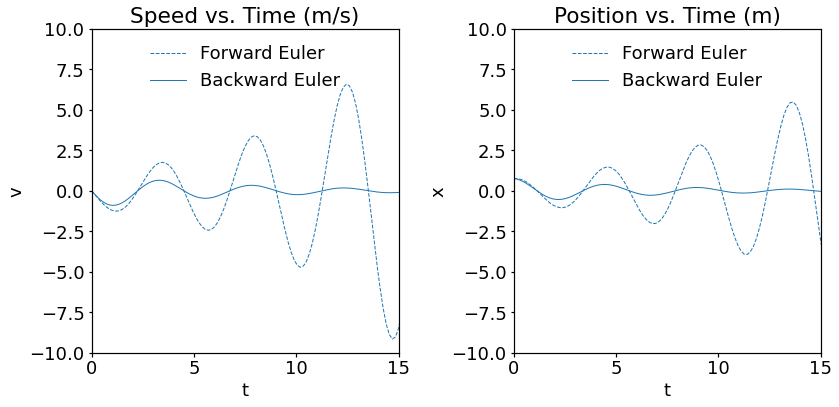

In [94]:
fig, ax = plt.subplots(1,2,figsize=(12,6))

# plotting veloicty
ax[0].plot(t,y_exp[:,1],'--',label='Forward Euler')
ax[0].plot(t,y_imp[:,1],label='Backward Euler')

ax[0].set_xlabel('t')
ax[0].set_ylabel('v')
ax[0].set_title('Speed vs. Time (m/s)')

# plotting position
ax[1].plot(t,y_exp[:,0],'--',label='Forward Euler')
ax[1].plot(t,y_imp[:,0],label='Backward Euler')

ax[1].set_xlabel('t')
ax[1].set_ylabel('x')
ax[1].set_title('Position vs. Time (m)')

for axis in ax:
    axis.set_xlim(0,15)
    axis.set_ylim(-10,10)
    axis.legend(loc='upper center')
